# Simpson Paradox

In [803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

![https://www.verywellhealth.com/thmb/iKn7fNL61FNYra3zc2FBLggrQSg=/1333x1000/smart/filters:no_upscale()/what-is-a-total-cholesterol-level-698073-b6bf870bf8a149bebb755fdcb31aa82c.png](https://www.verywellhealth.com/thmb/iKn7fNL61FNYra3zc2FBLggrQSg=/1333x1000/smart/filters:no_upscale()/what-is-a-total-cholesterol-level-698073-b6bf870bf8a149bebb755fdcb31aa82c.png)

## Group A

In [796]:
a_samples = 200
a_age = np.random.uniform(10, 60, a_samples)
a_exercise = np.random.uniform(1, 5, a_samples)
a_cholesterol = 202 + 0.2*a_age -2.5*a_exercise + np.random.randn(a_samples)*3

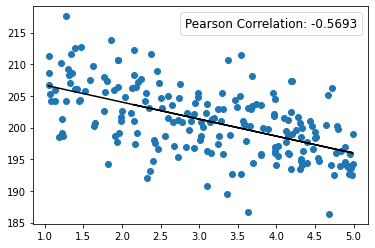

In [799]:
x = a_exercise[:, np.newaxis]
y = a_cholesterol[:, np.newaxis]
reg = LinearRegression().fit(x, y)
plt.scatter(a_exercise, a_cholesterol)
pred = reg.predict(x)
plt.plot(a_exercise, pred, color = 'k')
corr, _ = pearsonr(a_exercise, a_cholesterol)

# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
plt.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)

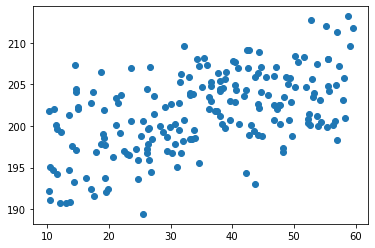

In [791]:
plt.scatter(a_age, a_cholesterol)

## Group B

In [753]:
b_age = np.random.uniform(60, 100, a_samples)
b_exercise = np.random.uniform(5, 10, a_samples) 
b_cholesterol = 210 + 0.22*b_age -2.2* b_exercise + np.random.randn(a_samples)*3

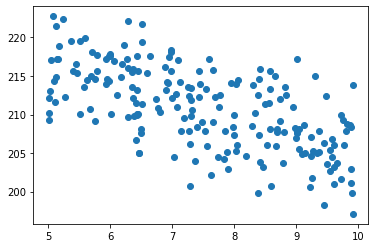

In [754]:
plt.scatter(b_exercise, b_cholesterol)

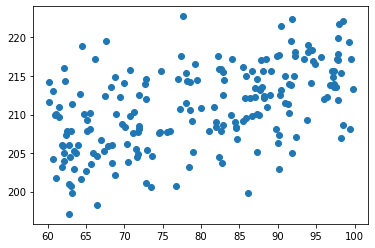

In [755]:
plt.scatter(b_age, b_cholesterol)

## Total Distribution

In [873]:
ex = np.append(a_exercise, b_exercise)
ch = np.append(a_cholesterol, b_cholesterol)
age = np.append(a_age, b_age)

In [874]:
x = a_exercise[:, np.newaxis]
y = a_cholesterol[:, np.newaxis]
reg = LinearRegression().fit(x, y)
pred = reg.predict(x)

x = b_exercise[:, np.newaxis]
y = b_cholesterol[:, np.newaxis]
reg = LinearRegression().fit(x, y)
pred2 = reg.predict(x)

x = ex[:, np.newaxis]
y = ch[:, np.newaxis]
reg = LinearRegression().fit(x, y)
pred3 = reg.predict(x)

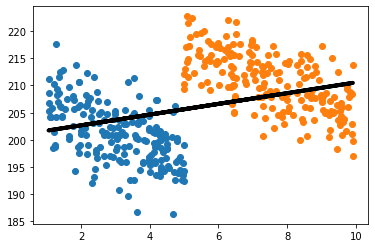

In [878]:
plt.scatter(a_exercise,  a_cholesterol)
plt.scatter(b_exercise,  b_cholesterol)
#plt.scatter(ex, ch)
plt.plot(ex, pred3, color = 'black', linewidth=4.0)

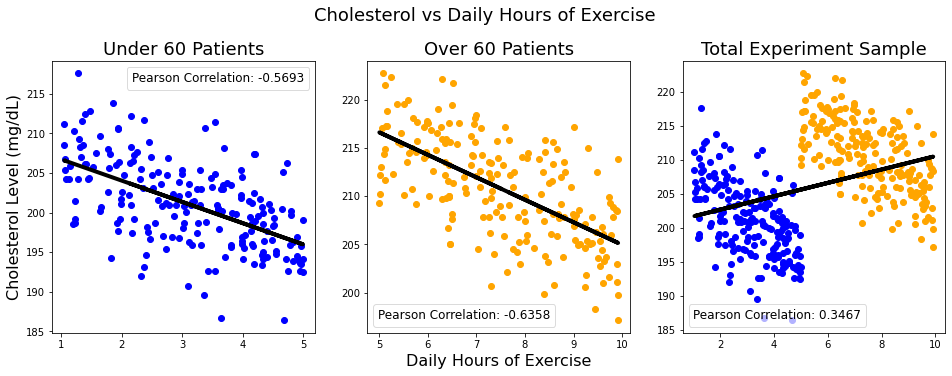

In [879]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))
fig.suptitle('Cholesterol vs Daily Hours of Exercise', fontsize=18, y = 1.03)
ax1.set_title('Under 60 Patients', fontsize=18)
ax1.set_ylabel('Cholesterol Level (mg/dL)', fontsize=16)
ax1.scatter(a_exercise,  a_cholesterol, c='blue')
ax1.plot(a_exercise, pred, color = 'black', linewidth=4.0)
corr, _ = pearsonr(a_exercise, a_cholesterol)
# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
ax1.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
ax2.set_title('Over 60 Patients', fontsize=18)
ax2.set_xlabel('Daily Hours of Exercise', fontsize=16)
ax2.scatter(b_exercise,  b_cholesterol, c='orange')
ax2.plot(b_exercise, pred2, color = 'black', linewidth=4.0)
corr, _ = pearsonr(b_exercise, b_cholesterol)
# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
ax2.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
ax3.set_title('Total Experiment Sample', fontsize=18)
ax3.scatter(a_exercise,  a_cholesterol, c='blue')
ax3.scatter(b_exercise,  b_cholesterol, c='orange')
ax3.plot(ex, pred3, color = 'black', linewidth=4.0)
corr, _ = pearsonr(ex, ch)
# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
ax3.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
plt.savefig('simpson1.png', dpi=700, bbox_inches='tight')
plt.show()

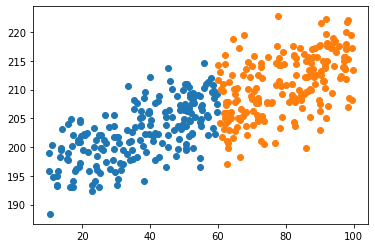

In [758]:
plt.scatter(a_age, a_cholesterol)
plt.scatter(b_age, b_cholesterol)

In [881]:
x = a_age[:, np.newaxis]
y = a_cholesterol[:, np.newaxis]
reg = LinearRegression().fit(x, y)
pred = reg.predict(x)

x = b_age[:, np.newaxis]
y = b_cholesterol[:, np.newaxis]
reg = LinearRegression().fit(x, y)
pred2 = reg.predict(x)

x = age[:, np.newaxis]
y = ch[:, np.newaxis]
reg = LinearRegression().fit(x, y)
pred3 = reg.predict(x)

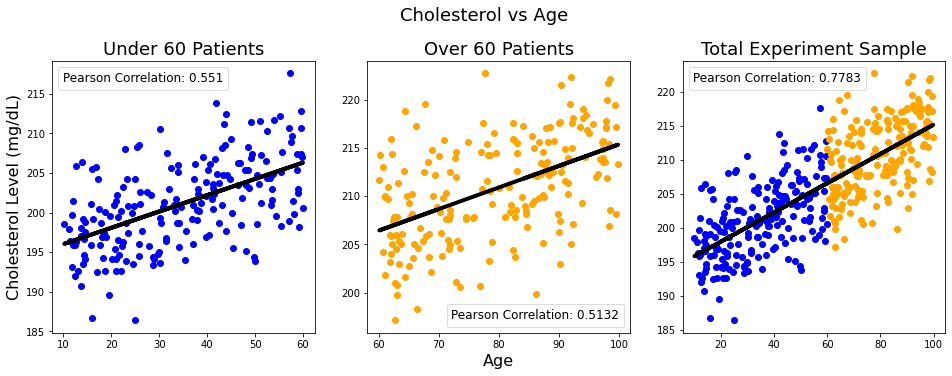

In [883]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))
fig.suptitle('Cholesterol vs Age', fontsize=18, y = 1.03)
ax1.set_title('Under 60 Patients', fontsize=18)
ax1.set_ylabel('Cholesterol Level (mg/dL)', fontsize=16)
ax1.scatter(a_age,  a_cholesterol, c='blue')
ax1.plot(a_age, pred, color = 'black', linewidth=4.0)
corr, _ = pearsonr(a_age, a_cholesterol)
# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
ax1.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
ax2.set_title('Over 60 Patients', fontsize=18)
ax2.set_xlabel('Age', fontsize=16)
ax2.scatter(b_age,  b_cholesterol, c='orange')
ax2.plot(b_age, pred2, color = 'black', linewidth=4.0)
corr, _ = pearsonr(b_age, b_cholesterol)
# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
ax2.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
ax3.set_title('Total Experiment Sample', fontsize=18)
ax3.scatter(a_age,  a_cholesterol, c='blue')
ax3.scatter(b_age,  b_cholesterol, c='orange')
ax3.plot(age, pred3, color = 'black', linewidth=4.0)
corr, _ = pearsonr(age, ch)
# Add text from: https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-matplotlib
handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)]
labels = []
labels.append("Pearson Correlation: {0:.4g}".format(corr))
ax3.legend(handles, labels, loc='best', fontsize='large', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
plt.savefig('simpson2.png', dpi=700, bbox_inches='tight')
plt.show()

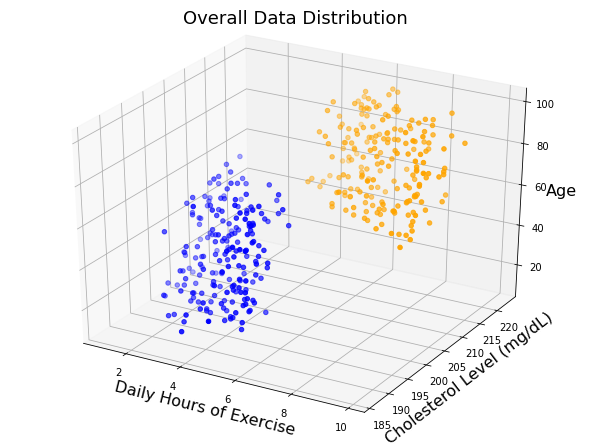

In [884]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.scatter(a_exercise,  a_cholesterol, a_age, c='blue')
ax.scatter(b_exercise,  b_cholesterol, b_age, c='orange')
ax.set_xlabel('Daily Hours of Exercise', fontsize=16)
ax.set_ylabel('Cholesterol Level (mg/dL)', fontsize=16)
ax.set_zlabel('Age', fontsize=16)
ax.set_title('Overall Data Distribution', fontsize=18, y = 1.03)
plt.savefig('simpson3.png', dpi=700, bbox_inches='tight')
plt.show()